## Dataset 2 - Representations from ResNet

In [1]:
from LogRegClassifier import LogRegClassifier
from KNNClassifier import KNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [2]:
study_name = "dataset2"
device = DatasetRun.get_device()

Device used: cuda


### Sample run

Using KNNClassifier:

In [3]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=2, gamma_1=0.85, gamma_2=1.55, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the Logistic Regression Classifier
kmeans = KMeans(n_clusters=50, metric=metric_kmeans, seed=42)
clf = KNNClassifier(n_neighbors=4,
                    metric=metric,
                    is_normalization=True,
                    tukey_lambda=0.4,
                    kmeans=kmeans,
                    device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=True)

task 0: (time: 93.2085s)
FeCAM accuracy: 83.5600; My accuracy: 84.1400
task 1: (time: 41.0043s)
FeCAM accuracy: 76.5167; My accuracy: 77.0167
task 2: (time: 33.8533s)
FeCAM accuracy: 72.1286; My accuracy: 73.0286
task 3: (time: 38.9127s)
FeCAM accuracy: 67.6625; My accuracy: 68.7375
task 4: (time: 32.4916s)
FeCAM accuracy: 64.5333; My accuracy: 65.5000
task 5: (time: 37.5348s)
FeCAM accuracy: 62.2800; My accuracy: 63.7000


Using LogRegClassifier:

In [5]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=2, gamma_1=1, gamma_2=1, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the Logistic Regression Classifier
kmeans = KMeans(n_clusters=30, metric=metric_kmeans)
clf = LogRegClassifier(n_store=50,
                       selection_method='all',
                       metric=metric,
                       is_normalization=True,
                       tukey_lambda=0.5,
                       kmeans=kmeans,
                       device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset2', n_tasks=6, only_last=False, verbose=True)

task 0: (time: 22.8270s)
FeCAM accuracy: 83.5600; My accuracy: 83.5800
task 1: (time: 25.8181s)
FeCAM accuracy: 76.5167; My accuracy: 74.4500
task 2: (time: 35.5264s)
FeCAM accuracy: 72.1286; My accuracy: 70.0286
task 3: (time: 42.1755s)
FeCAM accuracy: 67.6625; My accuracy: 65.9125
task 4: (time: 52.1900s)
FeCAM accuracy: 64.5333; My accuracy: 63.0222
task 5: (time: 63.0565s)
FeCAM accuracy: 62.2800; My accuracy: 61.3500


## Grid search results

plot accuracy over trials (to check how well did the grid search work)

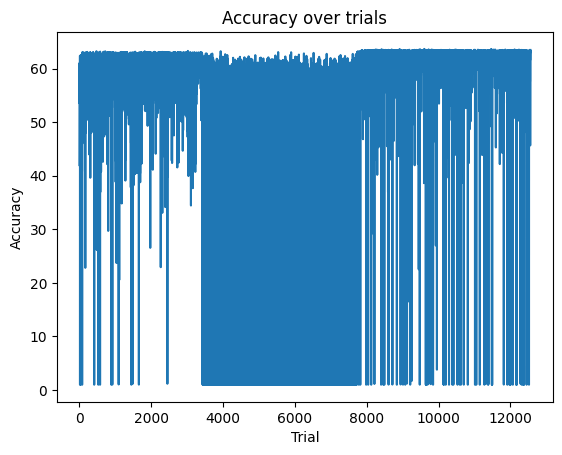

In [3]:
DatasetRun.plot_accuracy_trials(study_name=study_name, path='../results/', ylim=False)

plot accuracies against hyperparameters' values 

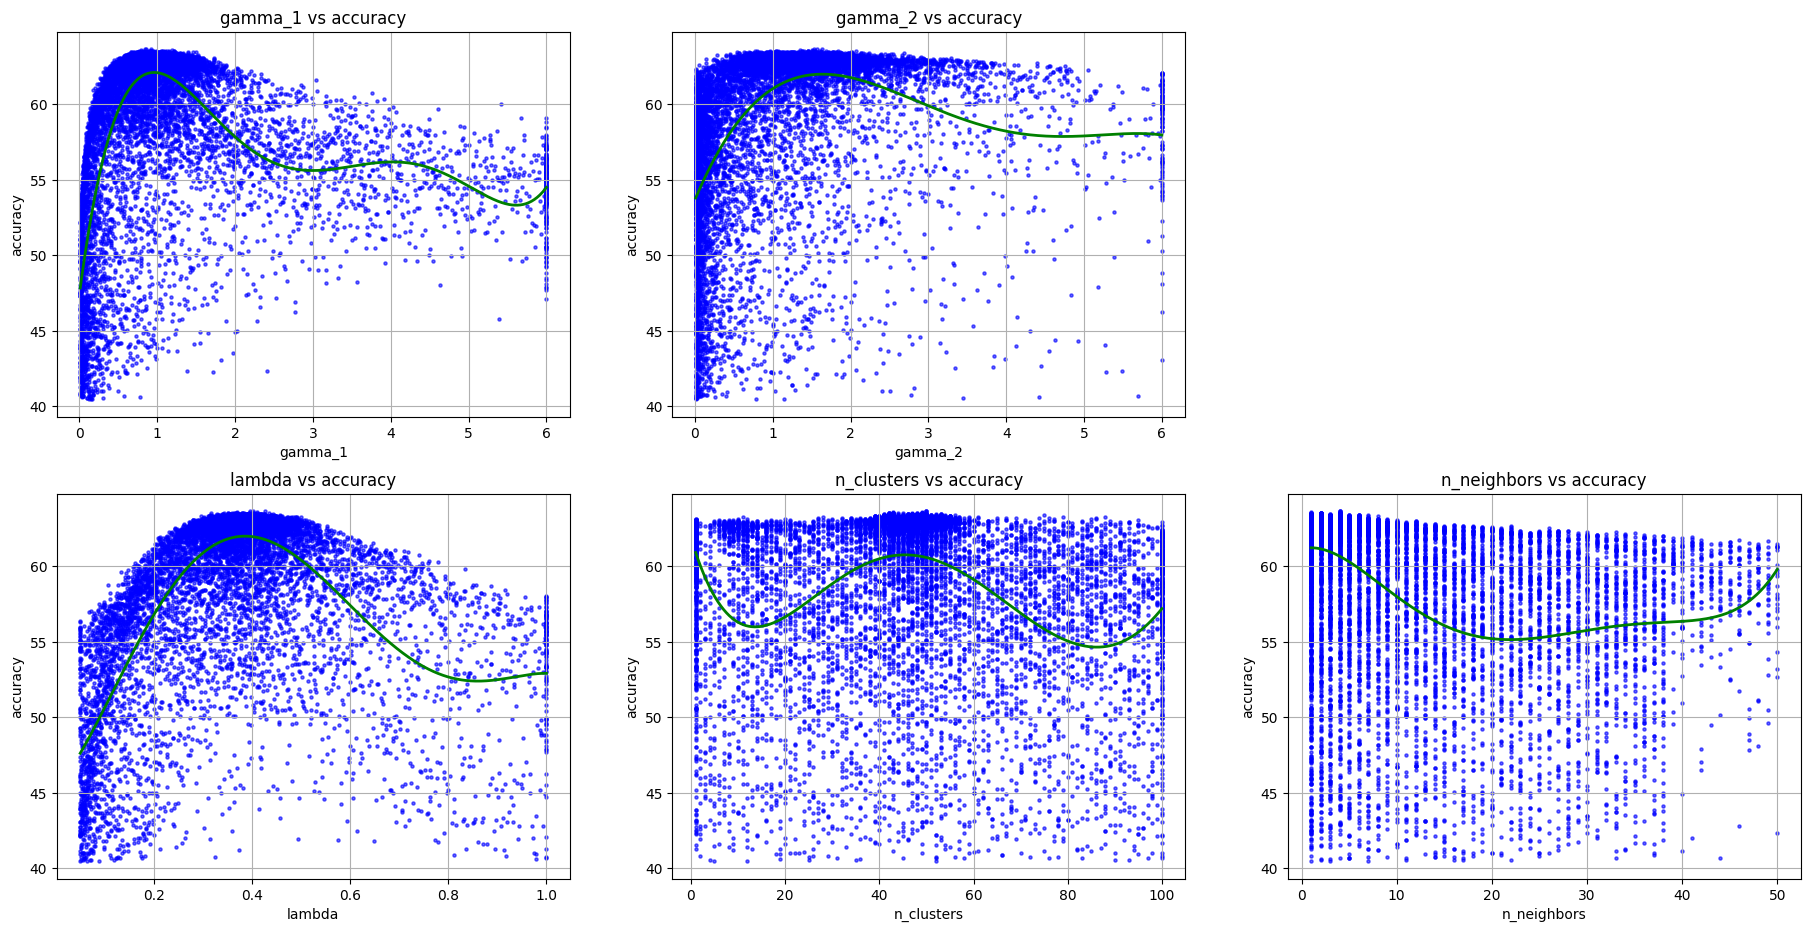

In [4]:
DatasetRun.plot_hyperparameters(study_name, path='../results/', columns=3, deg=5, ylim=True)

display the top hyperparameters

In [5]:
display(DatasetRun.print_results(study_name, path='../results/', only_important=True))

,value,gamma_1,gamma_2,knn_metric,lambda,n_clusters,n_neighbors
9601,63.66,0.851030,1.562573,euclidean,0.396758,50.0,4.0
8916,63.64,0.846488,1.524067,euclidean,0.426786,50.0,4.0
11465,63.64,0.924535,1.634018,euclidean,0.402657,50.0,4.0
9484,63.60,1.187070,1.350559,euclidean,0.370211,43.0,1.0
8413,63.59,0.796044,1.499764,euclidean,0.410996,49.0,4.0
...,...,...,...,...,...,...,...
6139,0.99,0.826875,5.990637,mahalanobis,0.751285,7.0,1.0
3621,0.99,0.027857,2.153838,euclidean,0.061005,96.0,6.0
6629,0.99,0.035156,1.292475,euclidean,0.169722,96.0,18.0
4562,0.98,0.013709,0.785339,mahalanobis,0.162316,20.0,17.0
